As a training for myself to get more familiar with image classification and OpenCV I followed the tutorial on http://www.pyimagesearch.com/2014/08/04/opencv-python-color-detection/. I modified it slightly to fit my environment.

### Imports

In [1]:
import cv2
from IPython.core.interactiveshell import InteractiveShell
import matplotlib.pyplot as plt
import numpy as np
import os

### Settings

In [2]:
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
DATA_DIR = '../input/images/'

Retrieve the first image for each character.

In [3]:
images = {f[:-4]:DATA_DIR+f for f in os.listdir(DATA_DIR) if f.endswith('.jpg') and '_01' in f}
images

{'luigi_01': '../input/images/luigi_01.jpg',
 'mario_01': '../input/images/mario_01.jpg',
 'peach_01': '../input/images/peach_01.jpg',
 'toad_01': '../input/images/toad_01.jpg'}

### Display the Mario image using matplotlib

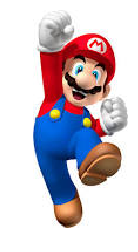

In [4]:
img = plt.imread(images['mario_01'])
plt.imshow(img)
plt.axis('off');

## Color detection

First read the images using OpenCV.

In [5]:
mario_image = cv2.imread(images['mario_01'])
luigi_image = cv2.imread(images['luigi_01'])
peach_image = cv2.imread(images['peach_01'])
toad_image = cv2.imread(images['toad_01'])

Next we set up the boundaries for the images. Since I am working with Mario, Luigi, Toad and Peach the easy choices are blue, red, green, pink and white. Note that the colors for OpenCV are not in in RGB order but in BGR. For example for the blue boundary the 0 is the lower bound for blue and 200 the upper bound.

In [6]:
blue_boundary = ([0, 46, 0], [200, 100, 112])
red_boundary = ([0, 0, 150], [40, 21, 255])
green_boundary = ([23, 140, 33], [51, 191, 65])
pink_boundary = ([141, 79, 234], [201, 144, 255])
white_boundary = ([200, 200, 200], [252, 252, 252])

# Combine the bounaries in one list
boundaries = [
    blue_boundary,
    red_boundary,
    green_boundary,
    pink_boundary,
    white_boundary,
]

Make a list of the images for the four characters.

In [7]:
input_images = [
    {'image' : toad_image},
    {'image' : peach_image},
    {'image' : mario_image},
    {'image' : luigi_image}
]

Now loop through the images first and for each image loop through the boundaries. The

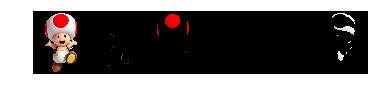

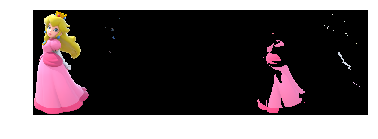

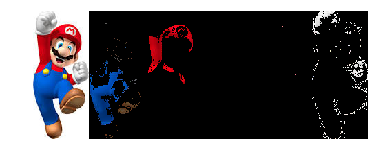

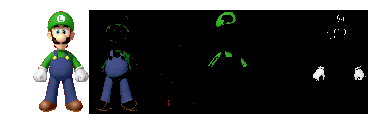

In [8]:
# Loop through the images
for item in input_images:
    outputs = []
    # Loop through the boundaries
    for (lower, upper) in boundaries:
        # Create NumPy arrays from the boundaries
        lower = np.array(lower, dtype = "uint8")
        upper = np.array(upper, dtype = "uint8")
        # Check which pixels fall in between the boundaries and create a mask
        mask = cv2.inRange(item['image'], lower, upper)
        # Apply the mask to the input image
        output = cv2.bitwise_and(item['image'], item['image'], mask = mask)
        outputs.append(output)
    # Show the mask for each boundary
    plt.figure()
    plt.imshow(cv2.cvtColor(np.hstack([item['image'],
                                       outputs[0],
                                       outputs[1],
                                       outputs[2],
                                       outputs[3],
                                       outputs[4]]), cv2.COLOR_BGR2RGB))
    plt.axis('off');
    item['outputs'] = outputs
plt.axis('off');